In [2]:
#Gerekli paketler
#!pip install tabulate
#!pip install prophet

In [3]:
import pandas as pd
import requests
import yfinance as yf #finance paketi
import pickle

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from prophet import Prophet
from prophet.plot import plot_plotly,plot_components_plotly

In [7]:
#hisse_adi = 'MSFT' + '.IS' # Türkiye hisse senedi
hisse_adi = 'MSFT'
secilen_hisse = yf.download(hisse_adi , start="2000-01-01", end=None)
secilen_hisse.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,58.68750,59.3125,56.00000,58.28125,36.132256,53228400
2000-01-04,56.78125,58.5625,56.12500,56.31250,34.911720,54119000
2000-01-05,55.56250,58.1875,54.68750,56.90625,35.279812,64059600
2000-01-06,56.09375,56.9375,54.18750,55.00000,34.098015,54976600
2000-01-07,54.31250,56.1250,53.65625,55.71875,34.543606,62013600


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdjq3oh3q/_6ei2jb1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdjq3oh3q/ewju00ev.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93623', 'data', 'file=/tmp/tmpdjq3oh3q/_6ei2jb1.json', 'init=/tmp/tmpdjq3oh3q/ewju00ev.json', 'output', 'file=/tmp/tmpdjq3oh3q/prophet_modelfwzsajdc/prophet_model-20231210172714.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:27:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:27:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


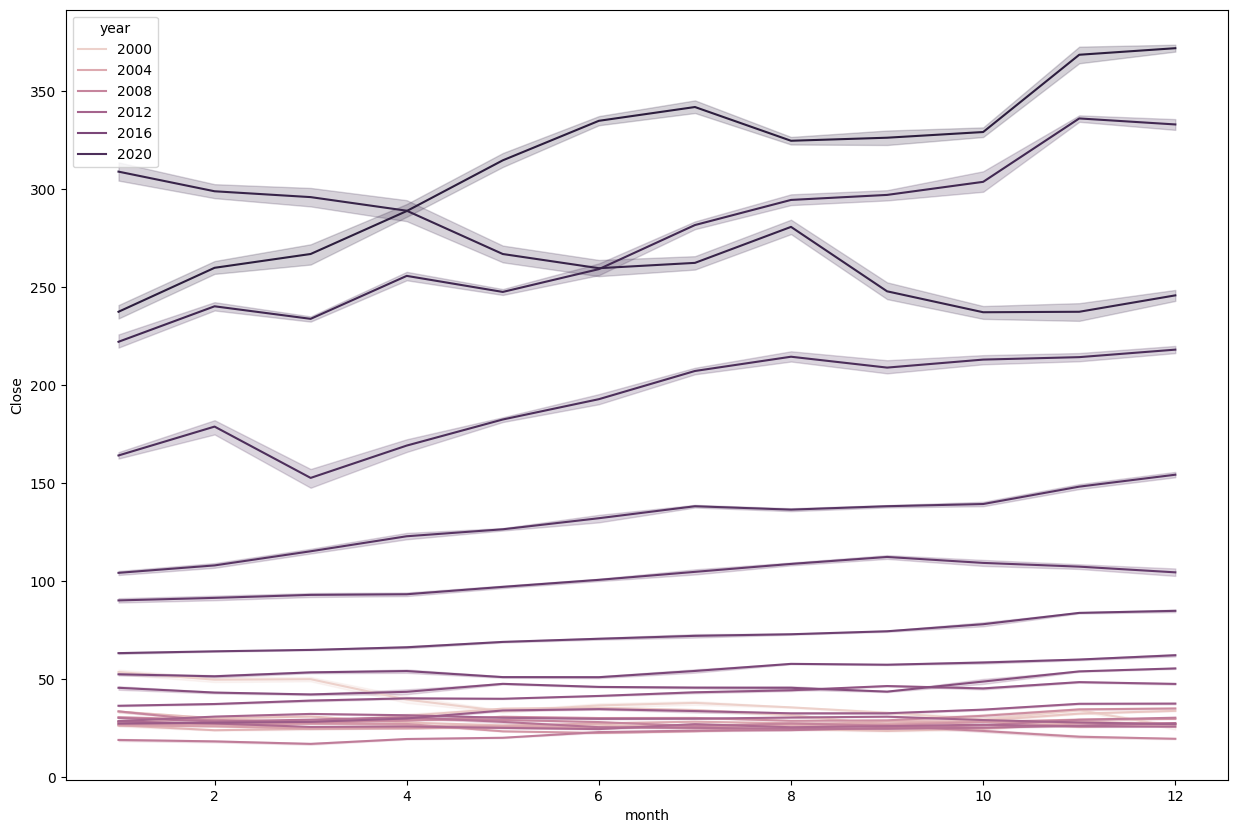

In [8]:
secilen_hisse['Date'] = pd.to_datetime(secilen_hisse.index.get_level_values('Date'), format='%Y-%m-%d')
secilen_hisse['year'] = secilen_hisse['Date'].dt.year
secilen_hisse['month'] = secilen_hisse['Date'].dt.month
secilen_hisse['day'] = secilen_hisse['Date'].dt.day

plt.figure(figsize=(15,10))
sns.lineplot(data=secilen_hisse, x='month', y='Close', hue='year')

model = Prophet()
model.fit(secilen_hisse.rename(columns={'Date': 'ds', 'Close': 'y'}))  # Sütunları yeniden adlandırın
forecastnew = model.make_future_dataframe(periods=365)
predictions = model.predict(forecastnew)
plot_plotly(model, predictions).update_layout(title="Next Year Temperature Prediction")

In [9]:
# Hisse senedi Canlı fiyatı çekme
lv_hissee = yf.Ticker(hisse_adi)
live_price = lv_hissee.history(period="1d")["Close"].iloc[0]
print(hisse_adi + " hissesi canlı fiyatı:", live_price)

MSFT hissesi canlı fiyatı: 374.2300109863281
